In [11]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
import scipy.linalg as la

from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [12]:
#loading dataset
dataset = pd.read_csv("DataB.csv")

In [13]:
#dividing data set into labels and target
X_train = dataset.iloc[:,1:-1]
Y_train = dataset.iloc[:,-1]
# X_train.shape
# print(X_train)
# Y_train.shape
# print(Y_train)
# Y_train.shape
taken_t= []

In [14]:
#function to plot the scatter plot of the models used
def scatter_plot(x, colors,method):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], c=palette[colors.astype(np.int)])
    ax.set_title(method)
    # add the labels for each digit corresponding to the label

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])

#### kernel PCA

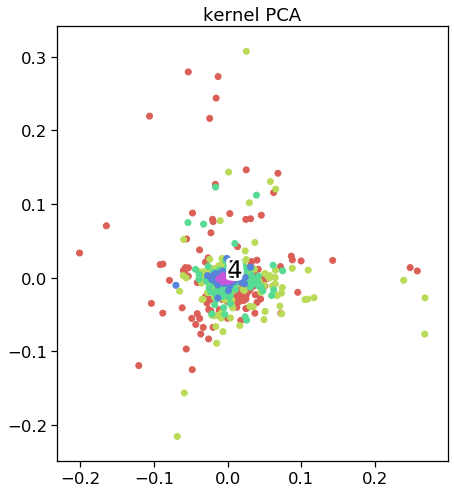

In [15]:
time_start = time.time()
kernel_Data = KernelPCA(n_components=2,kernel="rbf",random_state=42).fit_transform(X_train)
taken_t.append(["Kernel PCA",time.time()-time_start])
scatter_plot(kernel_Data, Y_train,"kernel PCA")

#### Isomap

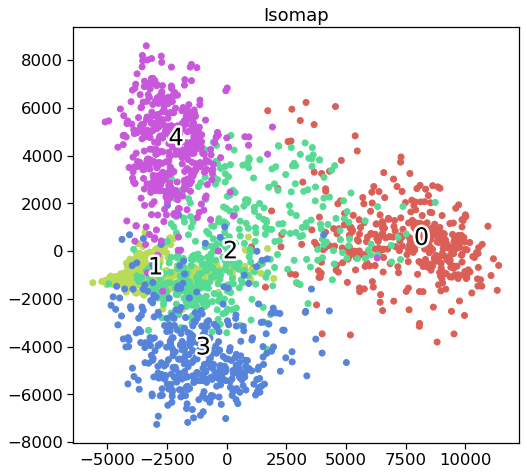

In [16]:
time_start = time.time()
iso_data = Isomap(n_components=2).fit_transform(X_train)
taken_t.append(["Isomap",time.time()-time_start])
scatter_plot(iso_data, Y_train,"Isomap")

#### Locally Linear Embedding (LLE)

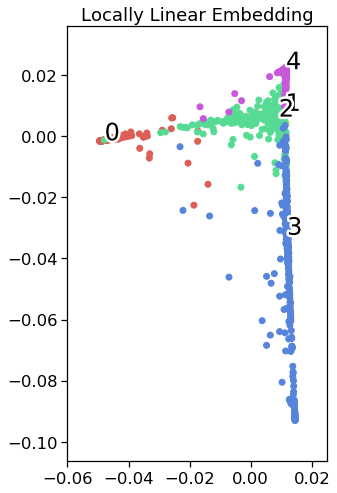

In [17]:
time_start = time.time()
lle_Data = LocallyLinearEmbedding(n_components=2,random_state=42).fit_transform(X_train)
taken_t.append(["LLE",time.time()-time_start])
scatter_plot(lle_Data, Y_train,"Locally Linear Embedding")

#### Laplacian Eigenmap (sklearn.manifold.SpectralEmbedding)

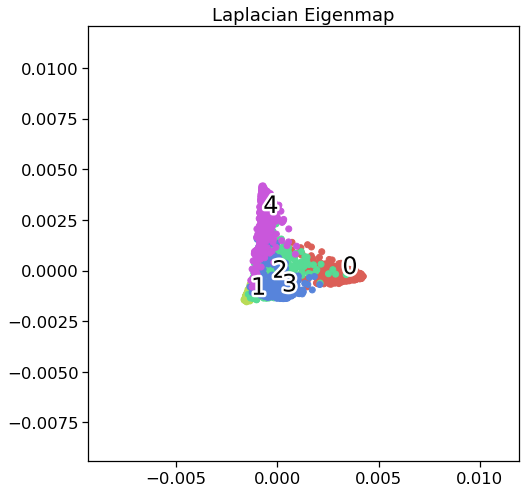

In [18]:
time_start = time.time()
se_Data = SpectralEmbedding(n_components=2,random_state=42).fit_transform(X_train)
taken_t.append(["Laplacian Eigenmap",time.time()-time_start])
scatter_plot(se_Data, Y_train,"Laplacian Eigenmap")

#### t-SNE

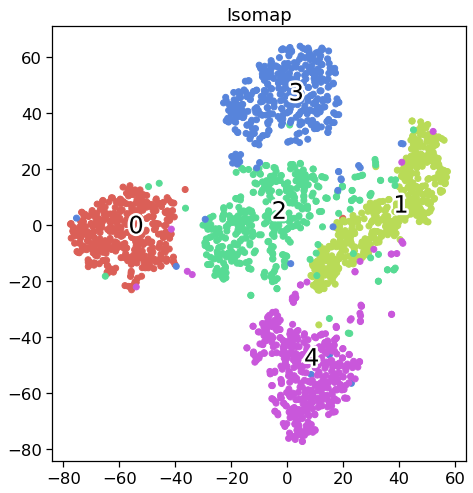

In [19]:
time_start = time.time()
sne_data = TSNE(n_components=2,random_state=42).fit_transform(X_train)
taken_t.append(["t-SNE",time.time()-time_start])
scatter_plot(sne_data, Y_train,"Isomap")

In [20]:
#different method for graph
# tsne_results = TSNE(n_components=2,random_state=42).fit_transform(X_train)
# df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
# df_tsne['label'] = Y_train
# sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

#printing time taken by different models
for k in taken_t:
    print("Time taken by {0} is {1} sec".format(k[0],k[1]))

Time taken by Kernel PCA is 2.9062304496765137 sec
Time taken by Isomap is 9.091676712036133 sec
Time taken by LLE is 8.138274431228638 sec
Time taken by Laplacian Eigenmap is 8.51992416381836 sec
Time taken by t-SNE is 23.531019926071167 sec


###### Which methods do better on which parts of the data?
 - kernel PCA -> Kernal PCA doesnt tend to perform well for this dataset.All clusters are emmbedded at the same location ,with lot of noise data surrounding them.The need for visualising data in clusters in 2D plane cannot be sufficed by this method.
 - Isomap ->This method classified the clusters into 5 groups as expected and seems to perform better for clusters of 3 and 4,but the other clusters doesnt tend to have good boundaries and this methods shows the effectively the nosie data points present.
 - Locally Linear Embedding (LLE) ->This method tends to preform better on clusters 0,3 and 4 where as it barely disingushed cluster 1 from 2.
 - Laplacian Eigenmap (sklearn.manifold.SpectralEmbedding) -> Laplacian Eigenmap tends to classify the data into 5 clusters with high density ,but no specific boundaries between them.
 - t-SNE ->t-SNE performed well in clustering the data into 5 clusters with good boundaries along with some noise data points.

###### Give at least three clear performance differences between a pair of methods that you can explain based on the nature of methods and the data. 

We can consider methods Isomap and t-SNE for comparision and stating the performance differences:

 - Computaional performance of Isomap is far better than that off the t-SNE.
 - As caluclated above ,the time taken by t-SNE for fitting the model is "48.4825 sec" where as Isomap has taken only "19.7505 sec".So Isomap is as twice fast as t-SNE.
 - The ability to reatin local structure of data: t-SNE model is based on Local approaches,which tends to retain local geometric structure in the lower dimensional space,in contrast Isomap is based on global approaches.The choice has to be made considering whether one has to retain the local sturcture or the global one.
 - Clustering representation:When considered the scatter plot of t-SNE ,we can observe that the clusters are more clear with good boundaries,where as in Isomap ,the clusters are overlapped with no perfect boundaries.In case if clear clustering is needed one should choose t-SNE for this dataset.
 
###### General Observations with Isomap and t-SNE:
 - As isomap operates on nearest neighbours approch ,we don’t take enough nearest neighbors, then the clustering of the graph varies.
 - Isomap is capable of retaining the local structure of the data while also revealing some important global structure (such as clusters at multiple scales)
 - Often different runs with the same hyperparameters will produce different results in t-SNE, so several plots must be observed before any evaluation with t-SNE is carried out.
 - Naturally, t-SNE extends large clusters and shrinks those of spares ones.So teh comparision of sizes of clusters in t-SNE graph might mean nothing.
 - Distance between the clusters in t-SNE might mean nothing as this approch is based on t-based distribution probablity of nearest data points.

###### What tradeoffs might need to be considered in order to decide which method is 'best' to use for this dataset?

As the given dataset has only 2066 observations and the required result is the dimensionality reduction of data for visualization , we can think of the following tradeoffs:

- Performance/Computational efficiency:
  - The time taken by different reduction methods/algorithms doesn't vary much as the dataset has less observations.So performance of the models can be traded off for the required quality like clustering cleanliness.If the data has around million observations the time taken by different algorithms might have large differences, in such senario we can cosider models which has better computational efficiency.
- Clustering Boundaries:
  - As discussed above,as the computational efficency can be traded off,we can consider the model which clusters the dataset into classes with definite boundaries and which has non-overlapping clusters.

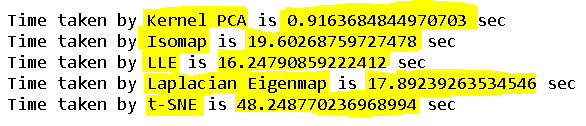

We can notice that the time taken by PCA is under 1 sec,but the clustering obtained by using kernal PCA is not useful to represent different clutesrs of the given dataset.We also can notice that Isomap,LLE and Laplacian Eigenmap has taken huge time when compared to KernelPCA(20 times) and half the time as t-SNE(approx).


###### We can observe that t-SNE has provied best clusters for this dataset which has good boundaries without getting rid of noise data.So the computational expense of t-SNE can be traded off for its ability to form proper clusters for this dataset.

References:

 - https://distill.pub/2016/misread-tsne/
 - https://scikit-learn.org/stable/modules/manifold.html
 - http://www.cs.toronto.edu/~hinton/absps/tsne.pdf
 - google tech talk on Visualizing Data Using t-SNE -> https://www.youtube.com/watch?v=RJVL80Gg3lA
 - A Global Geometric Framework for Nonlinear Dimensionality Reduction->http://web.mit.edu/cocosci/Papers/sci_reprint.pdf
 - An Introduction to Locally Linear Embedding -> https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf